In [48]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

In [49]:
names = ['Name','Label','Confidence','UserID','City','Country','lat','lon', 'Age', 'Profession', 'Transport','Architecture', 'Food', 'Nature', 'MainCategory']
dataset = pd.read_csv("F:/Masters/Semester 3/Thesis/rekognition/DBScan-dataset.csv", delimiter=",",names=names)
coords = dataset.as_matrix(columns=['lat', 'lon'])

C:\Users\Aniket\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
kms_per_radian = 6371.0088
epsilon = 1.5 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 25


In [51]:
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)
centermost_points = clusters.map(get_centermost_point)

In [52]:
lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'lon':lons, 'lat':lats})

In [53]:
rs = rep_points.apply(lambda row: dataset[(dataset['lat']==row['lat']) & (dataset['lon']==row['lon'])].iloc[0], axis=1)


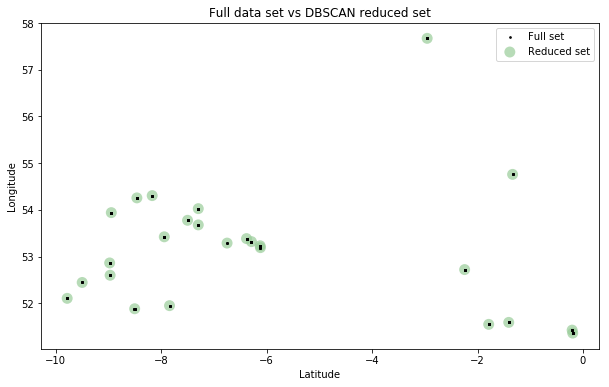

In [54]:
fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rs['lat'], rs['lon'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
df_scatter = ax.scatter(dataset['lat'], dataset['lon'], c='k', alpha=0.9, s=3)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()